# Anomaly plts

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

In [2]:
anom_ecco = xr.open_dataset('/home/jovyan/WMT-project/ECCO-budgets/anom_ecco')
anom_soda = xr.open_dataset('/home/jovyan/WMT-project/SODA/anom_soda')
anom_sose = xr.open_dataset('/home/jovyan/WMT-project/SOSE-budgets/anom_sose')

In [3]:
anom_ecco

<xarray.Dataset>
Dimensions:               (sigma2_bin: 37, time: 288)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.037e+03 1.037e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 1992-01-15 ... 2015-12-14
    time_snp              (time) datetime64[ns] ...
    month                 (time) int64 ...
Data variables: (12/17)
    R1                    (time, sigma2_bin) float64 ...
    R2                    (time, sigma2_bin) float64 ...
    dVdt                  (time, sigma2_bin) float64 ...
    omega_mix             (time, sigma2_bin) float64 ...
    omega_mix_slt         (time, sigma2_bin) float64 ...
    omega_mix_th          (time, sigma2_bin) float64 ...
    ...                    ...
    omega_total_th        (time, sigma2_bin) float64 ...
    omega_trans_rate      (time, sigma2_bin) float64 ...
    omega_trans_rate_slt  (time, sigma2_bin) float64 ...
    omega_trans_rate_th   (time, sigma2_bin) float64 ...
    psi_adv               (time, sigma2_bin) float64 ...
    psi_vel               (time, sigma2_bin) float64 ...

In [4]:
bot_ecco = - anom_ecco.isel(sigma2_bin=-1) + anom_ecco.sel(sigma2_bin=0, method='nearest')
bot_soda = - anom_soda.isel(sigma2_bin=-1) + anom_soda.sel(sigma2_bin=0, method='nearest')
bot_sose = - anom_sose.isel(sigma2_bin=-1) + anom_sose.sel(sigma2_bin=0, method='nearest')

In [5]:
bot_ecco

<xarray.Dataset>
Dimensions:               (time: 288)
Coordinates:
  * time                  (time) datetime64[ns] 1992-01-15 ... 2015-12-14
    time_snp              (time) datetime64[ns] NaT 1992-03-01 ... NaT
    month                 (time) int64 1 2 3 4 5 6 7 8 9 ... 5 6 7 8 9 10 11 12
Data variables: (12/17)
    R1                    (time) float64 nan nan nan nan ... 0.5945 0.6387 nan
    R2                    (time) float64 nan nan nan ... 0.7564 0.6741 0.6408
    dVdt                  (time) float64 nan nan nan nan ... 2.211 2.196 nan
    omega_mix             (time) float64 nan nan nan ... -2.517 -2.471 -2.488
    omega_mix_slt         (time) float64 nan nan nan nan ... 2.932 2.967 2.967
    omega_mix_th          (time) float64 nan nan nan ... -5.448 -5.438 -5.455
    ...                    ...
    omega_total_th        (time) float64 nan nan nan nan ... 1.61 1.436 nan
    omega_trans_rate      (time) float64 nan nan nan nan ... -0.6008 -0.5405 nan
    omega_trans_rate_slt  (time) float64 nan nan nan nan ... 4.028 4.078 nan
    omega_trans_rate_th   (time) float64 nan nan nan nan ... -4.629 -4.619 nan
    psi_adv               (time) float64 nan nan nan nan ... 2.228 2.108 nan
    psi_vel               (time) float64 nan nan nan nan ... 1.473 1.436 nan

In [6]:
anom_budget = - bot_ecco.dVdt + bot_ecco.psi_vel + bot_ecco.omega_trans_rate + bot_ecco.R1 + bot_ecco.R2
anom_budget

<xarray.DataArray (time: 288)>
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
       -6.95186004e-03, -6.89778678e-03, -6.52322762e-03, -6.44601258e-03,
       -6.47411003e-03, -6.40668600e-03, -6.44868864e-03, -6.32605313e-03,
       -5.73800991e-03, -5.08538109e-03, -4.39572494e-03, -3.67485826e-03,
       -3.31619142e-03, -2.98305731e-03, -3.14603378e-03, -3.52561753e-03,
       -3.85098630e-03, -3.97503600e-03, -3.82252358e-03, -3.64296682e-03,
       -3.40357562e-03, -2.97105150e-03, -2.47704962e-03, -2.20079845e-03,
       -2.07032200e-03, -1.98660969e-03, -1.60389358e-03, -1.34259836e-03,
       -1.41170769e-03, -1.41397438e-03, -1.57228123e-03, -1.62928953e-03,
       -2.08205611e-03, -2.69591983e-03, -3.13889511e-03, -3.27940931e-03,
       -2.87016125e-03, -2.24532650e-03, -1.71136431e-03, -1.26529701e-03,
       -6.97845674e-04, -4.07549096e-04,  6.58936225e-05,  1.54241823e-04,
        4.64774189e-04,  5.84656397e-04,  6.21268122e-04,  6.89479042e-04,
        5.68655593e-04,  4.42541110e-04,  3.20562396e-04,  4.98509184e-04,
        7.22499058e-04,  8.85119027e-04,  1.23783455e-03,  1.75035793e-03,
        2.41023700e-03,  2.93341022e-03,  3.21959149e-03,  2.92948672e-03,
        2.34125795e-03,  1.72024345e-03,  9.72305237e-04,  4.11662671e-04,
       -2.70061510e-04, -8.96563718e-04, -1.84474017e-03, -2.42366648e-03,
...
        4.55083317e-03,  5.06809278e-03,  5.42401099e-03,  5.58061740e-03,
        4.84984605e-03,  3.67579883e-03,  2.54264988e-03,  2.28805753e-03,
        2.68256414e-03,  3.41952230e-03,  4.52311686e-03,  5.55423022e-03,
        6.43254692e-03,  7.58447757e-03,  8.92674104e-03,  1.07616159e-02,
        1.30651435e-02,  1.56939293e-02,  1.82450446e-02,  2.00475564e-02,
        2.19951955e-02,  2.33851723e-02,  2.40129156e-02,  2.44269349e-02,
        2.47339438e-02,  2.40959256e-02,  2.29760830e-02,  2.13081173e-02,
        1.94768216e-02,  1.74709082e-02,  1.51802466e-02,  1.33538554e-02,
        1.08868758e-02,  8.73296636e-03,  7.23202839e-03,  6.20263059e-03,
        5.25944750e-03,  5.41602228e-03,  5.52061989e-03,  5.79531151e-03,
        6.41366813e-03,  6.46624335e-03,  6.85997441e-03,  6.73217332e-03,
        7.06072119e-03,  7.48821973e-03,  7.81750900e-03,  7.85102326e-03,
        8.03982430e-03,  7.62849867e-03,  7.54972982e-03,  7.07429180e-03,
        6.00292385e-03,  5.54869709e-03,  5.12093678e-03,  4.61355313e-03,
        4.24793382e-03,  3.91415199e-03,  3.50070401e-03,  3.43085553e-03,
        3.42692075e-03,  3.81256036e-03,  4.17361382e-03,  5.47435010e-03,
        6.82086344e-03,  7.82597923e-03,  9.11803237e-03,  1.03803872e-02,
        1.15886676e-02,  1.27886691e-02,  1.39655207e-02,  1.50147595e-02,
        1.58585405e-02,  1.66465782e-02,  1.74743842e-02,  1.73961845e-02,
        1.33332475e-02,  1.20511760e-02,  1.19918302e-02,             nan])
Coordinates:
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
    time_snp  (time) datetime64[ns] NaT 1992-03-01 1992-04-01 ... 2015-12-01 NaT
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [7]:
anom_bdgt_nores = - bot_ecco.dVdt + bot_ecco.psi_vel + bot_ecco.omega_trans_rate
anom_bdgt_nores

<xarray.DataArray (time: 288)>
array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  1.08205529,  1.03869371,  1.16043841,
        1.28998469,  1.40221626,  1.21844593,  1.06166891,  0.80080698,
        0.62343709,  0.56223296,  0.47895258,  0.51784949,  0.54988466,
        0.61114976,  0.65537618,  0.44795364,  0.38445979,  0.51324744,
        0.71824252,  0.79326538,  0.76883935,  0.73376079,  0.67265961,
        0.73263124,  0.50585045,  0.39021598,  0.37863429,  0.49122478,
        0.45591974,  0.41637904,  0.33847941,  0.33307027,  0.3304491 ,
        0.34325969,  0.43701472,  0.22942408,  0.19809985,  0.27595833,
        0.31192711,  0.20714655,  0.10496515,  0.29461801,  0.19511414,
        0.26326172,  0.17771048,  0.1179591 , -0.04395569,  0.18904223,
        0.43351182,  0.53656165,  0.52442646,  0.77167383,  0.92466817,
        0.78827666,  0.88739119,  0.86467012,  1.04208566,  1.11864537,
        1.32723734,  1.24038952,  1.01056315,  1.18615033,  1.14019045,
        0.9116421 ,  0.85320852,  0.70748874,  0.41383702,  0.38462891,
        0.01354556, -0.04120295, -0.08326106,  0.01992924,  0.02477212,
       -0.20276852, -0.21421475, -0.11882585, -0.09123333, -0.03268151,
        0.14152944,  0.08954315,  0.2324795 ,  0.3287306 ,  0.53838355,
        0.3608369 ,  0.58527108,  0.68183261,  0.8831071 ,  0.81195125,
...
       -0.48064631, -0.36275228, -0.354611  , -0.35313904, -0.13709762,
        0.03718924,  0.23099836,  0.52733412,  0.4800031 ,  0.62821664,
        0.72486847,  0.8184966 ,  0.5798872 ,  0.61016661,  0.51376259,
        0.52911394,  0.35075501, -0.01406769,  0.06348173,  0.06334282,
        0.08299896, -0.00909228, -0.19512355, -0.26085669, -0.45577273,
       -0.96772164, -1.22912624, -1.57719322, -1.53692199, -1.4939586 ,
       -1.57948262, -1.56365118, -1.79064367, -1.94202567, -2.08025638,
       -2.1218157 , -2.05918022, -1.7844906 , -1.53100551, -1.3636461 ,
       -1.36472299, -0.95190045, -0.88190915, -0.73863823, -0.43558054,
       -0.34439372, -0.5526225 , -0.5568112 , -0.48368713, -0.24412503,
       -0.22895929, -0.1002837 , -0.20294495, -0.42709163, -0.50841372,
       -0.42618253, -0.48154407, -0.33474139,  0.16159354,  0.31803797,
        0.37362319,  0.26015202,  0.17884925,  0.03535711, -0.03838814,
       -0.03457316,  0.0586877 , -0.19123123, -0.17715187, -0.24706143,
       -0.36244888, -0.39787319, -0.35332882, -0.49580165, -0.39021652,
       -0.35164584, -0.26674675, -0.43020275, -0.55125461, -0.67316914,
       -0.93128535, -0.73419855, -0.74398523, -0.82570053, -0.97349997,
       -1.13875873, -1.45514888, -1.56682984, -1.79199865, -1.63672882,
       -1.71626066, -1.70185058, -1.30669562, -1.58276771, -1.60469093,
       -1.33884533, -1.30080166,         nan])
Coordinates:
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
    time_snp  (time) datetime64[ns] NaT 1992-03-01 1992-04-01 ... 2015-12-01 NaT
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

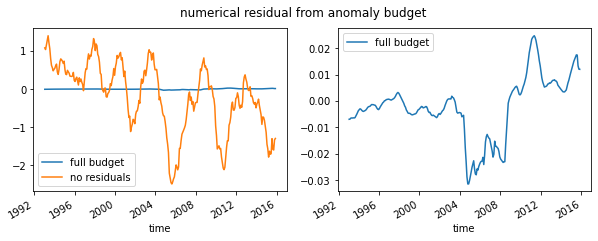

In [8]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
anom_budget.plot(ax=ax0, label='full budget')
anom_bdgt_nores.plot(ax=ax0, label='no residuals')

anom_budget.plot(ax=ax1, label='full budget')

ax0.legend()
ax1.legend()
plt.suptitle('numerical residual from anomaly budget');

In [39]:
np.arange(2006, 2011)

array([2006, 2007, 2008, 2009, 2010])

In [47]:
>>> locs, labels = xticks()  # Get the current locations and labels.
>>> xticks(np.arange(0, 1, step=0.2))  # Set label locations.
>>> xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])  # Set text labels.
>>> xticks([0, 1, 2], ['January', 'February', 'March'],
...        rotation=20)  # Set text labels and properties.
>>> xticks([])  # Disable xticks.

NameError: name 'xticks' is not defined

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (5).

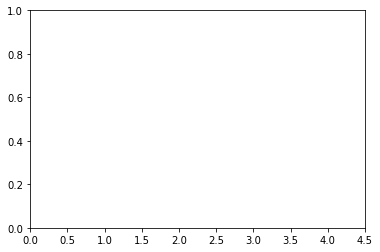

In [53]:
plt.figure()
plt.xticks(np.arange(0, 5, step=0.5), list(np.arange(2006, 2011)))

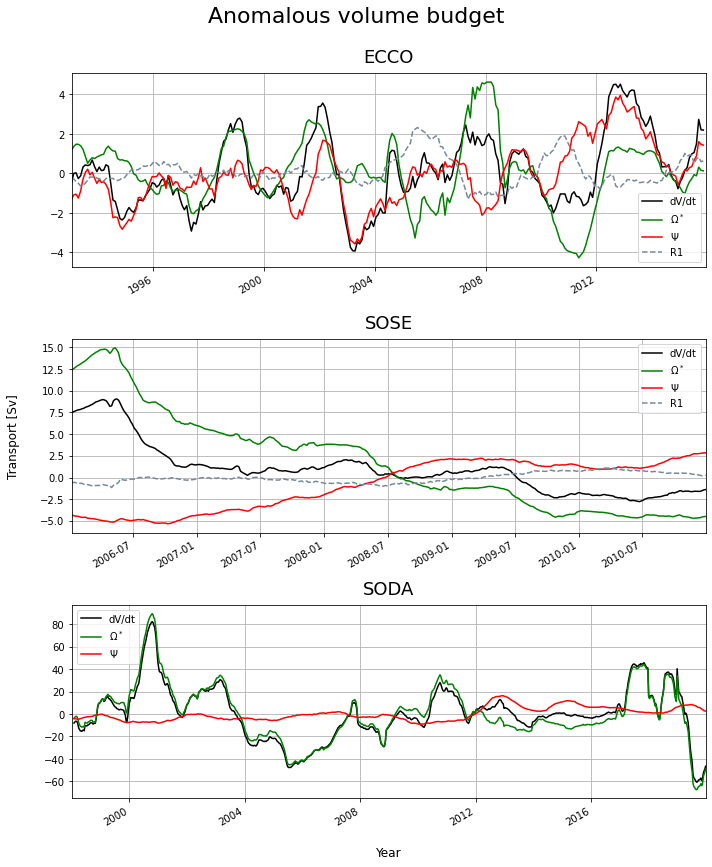

In [57]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,12), sharex=False)

bot_ecco.dVdt.plot(label='dV/dt', color='k', ax=ax0)
(bot_ecco.omega_trans_rate+bot_ecco.R2).plot(label=r'$\Omega^*$', color='green', ax=ax0)
bot_ecco.psi_vel.plot(label=r'$\Psi$', color='red', ax=ax0)
bot_ecco.R1.plot(label='R1', color='lightslategray', linestyle='--', ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.legend()
ax0.grid()
ax0.set_title('ECCO', fontsize=18, pad=11)
ax0.set_xlim(bot_ecco.time[12], bot_ecco.time[-1])

bot_sose.dVdt.plot(label='dV/dt', color='k', ax=ax1)
(bot_sose.omega_trans_rate+bot_sose.R2).plot(label=r'$\Omega^*$', color='green', ax=ax1)
bot_sose.psi_vel.plot(label=r'$\Psi$', color='red', ax=ax1)
bot_sose.R1.plot(label='R1', color='lightslategray', linestyle='--', ax=ax1)
ax1.set_ylabel(r'Transport [Sv]', fontsize=12, labelpad=20)
ax1.set_title('SOSE', fontsize=18, pad=11)
ax1.set_xlabel('')
ax1.legend()
ax1.grid()
ax1.set_xlim(bot_sose.time[73], bot_sose.time[-1])

(bot_soda.dVdt/1e6).plot(label='dV/dt', color='k', ax=ax2)
bot_soda.omega_trans.plot(label=r'$\Omega^*$', color='green', ax=ax2)
bot_soda.psi_vel.plot(label=r'$\Psi$', color='red', ax=ax2)
ax2.grid()
ax2.legend()
ax2.set_ylabel('')
ax2.set_title('SODA', fontsize=18, pad=11)
ax2.set_xlabel('Year', fontsize=12, labelpad=20)
ax2.set_xlim(bot_soda.time[32], bot_soda.time[-1])

plt.suptitle('Anomalous volume budget', fontsize=22, y=1)
plt.tight_layout()
plt.savefig('anom-stacked.pdf');

## $\Omega$'s components

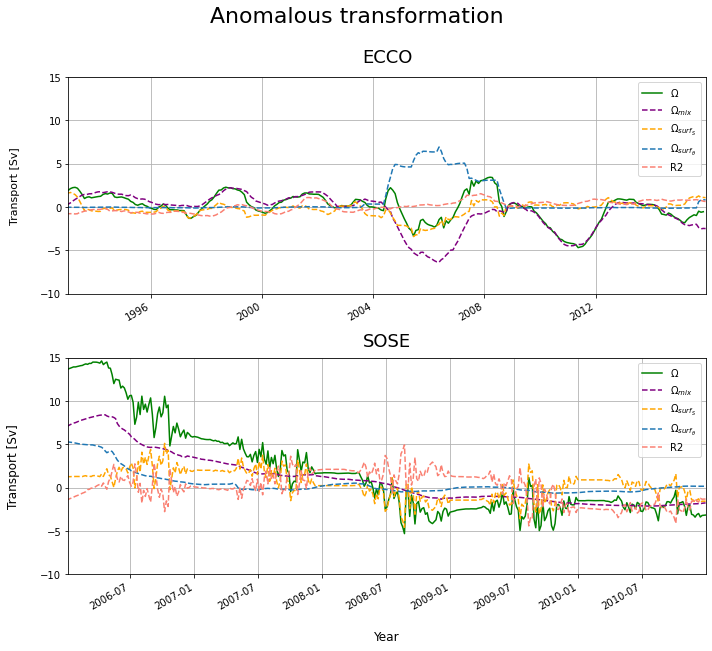

In [58]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,9))

bot_ecco.omega_trans_rate.plot(label=r'$\Omega$', color='green', ax=ax0)
bot_ecco.omega_mix.plot(label=r'$\Omega_{mix}$', color='purple', linestyle='dashed', ax=ax0)
bot_ecco.omega_surf_slt.plot(label=r'$\Omega_{surf_S}$', color='orange', linestyle='dashed', ax=ax0)
bot_ecco.omega_surf_th.plot(label=r'$\Omega_{surf_\theta}$', color='C0', linestyle='dashed', ax=ax0)
bot_ecco.R2.plot(label='R2', color='salmon', linestyle='--', ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel(r'Transport [Sv]', fontsize=11, labelpad=20)
ax0.legend()
ax0.grid()
ax0.set_title('ECCO', fontsize=18, pad=15)
ax0.set_ylim(-10,15)
ax0.set_xlim(bot_ecco.time[12], bot_ecco.time[-1])

bot_sose.omega_trans_rate.plot(label=r'$\Omega$', color='green', ax=ax1)
bot_sose.omega_mix.plot(label=r'$\Omega_{mix}$', color='purple', linestyle='dashed', ax=ax1)
bot_sose.omega_surf_slt.plot(label=r'$\Omega_{surf_S}$', color='orange', linestyle='dashed', ax=ax1)
bot_sose.omega_surf_th.plot(label=r'$\Omega_{surf_\theta}$', color='C0', linestyle='dashed', ax=ax1)
bot_sose.R2.plot(label='R2', color='salmon', linestyle='--', ax=ax1)
ax1.grid()
ax1.legend()
ax1.set_xlabel('Year', fontsize=12, labelpad=20)
ax1.set_ylabel(r'Transport [Sv]', fontsize=12, labelpad=20)
ax1.set_title('SOSE', fontsize=18, pad=11)
ax1.set_xlim(bot_sose.time[73], bot_sose.time[-1])
ax1.set_ylim(-10,15)


plt.suptitle('Anomalous transformation', fontsize=22, y=1)
plt.tight_layout()
plt.savefig('anom-omegas-stacked.pdf');